# Exploratory Data Analysis and Data Cleaning

#### Import Appropriate Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Load in Datasets

In [2]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

## Data Cleaning

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [5]:
train.shape

(2051, 81)

In [6]:
test.shape

(879, 80)

In [7]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [8]:
test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [9]:
# Rename columns in both dataframes to be uniform
# Lower case the columns and replace spaces with underscore

train.columns = train.columns.str.lower().str.replace(' ', '_')
test.columns = test.columns.str.lower().str.replace(' ', '_')

In [10]:
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [11]:
test.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
id                 2051 non-null int64
pid                2051 non-null int64
ms_subclass        2051 non-null int64
ms_zoning          2051 non-null object
lot_frontage       1721 non-null float64
lot_area           2051 non-null int64
street             2051 non-null object
alley              140 non-null object
lot_shape          2051 non-null object
land_contour       2051 non-null object
utilities          2051 non-null object
lot_config         2051 non-null object
land_slope         2051 non-null object
neighborhood       2051 non-null object
condition_1        2051 non-null object
condition_2        2051 non-null object
bldg_type          2051 non-null object
house_style        2051 non-null object
overall_qual       2051 non-null int64
overall_cond       2051 non-null int64
year_built         2051 non-null int64
year_remod/add     2051 non-null int64
roof_style         20

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
id                 879 non-null int64
pid                879 non-null int64
ms_subclass        879 non-null int64
ms_zoning          879 non-null object
lot_frontage       719 non-null float64
lot_area           879 non-null int64
street             879 non-null object
alley              58 non-null object
lot_shape          879 non-null object
land_contour       879 non-null object
utilities          879 non-null object
lot_config         879 non-null object
land_slope         879 non-null object
neighborhood       879 non-null object
condition_1        879 non-null object
condition_2        879 non-null object
bldg_type          879 non-null object
house_style        879 non-null object
overall_qual       879 non-null int64
overall_cond       879 non-null int64
year_built         879 non-null int64
year_remod/add     879 non-null int64
roof_style         879 non-null object
roof_m

In [14]:
train['ms_subclass'] = train['ms_subclass'].astype('object')
test['ms_subclass'] = test['ms_subclass'].astype('object')

In [15]:
test.dtypes

id                  int64
pid                 int64
ms_subclass        object
ms_zoning          object
lot_frontage      float64
lot_area            int64
street             object
alley              object
lot_shape          object
land_contour       object
utilities          object
lot_config         object
land_slope         object
neighborhood       object
condition_1        object
condition_2        object
bldg_type          object
house_style        object
overall_qual        int64
overall_cond        int64
year_built          int64
year_remod/add      int64
roof_style         object
roof_matl          object
exterior_1st       object
exterior_2nd       object
mas_vnr_type       object
mas_vnr_area      float64
exter_qual         object
exter_cond         object
                   ...   
full_bath           int64
half_bath           int64
bedroom_abvgr       int64
kitchen_abvgr       int64
kitchen_qual       object
totrms_abvgrd       int64
functional         object
fireplaces  

In [16]:
# Drop columns with unusually high null counts
train.drop(columns = ['alley', 'pool_qc', 'misc_feature'], inplace = True)
test.drop(columns = ['alley', 'pool_qc', 'misc_feature'], inplace = True)

In [17]:
# Drop the rows with null values for Masonry Veneer Type
# Masonry Veneer Type should be none for none, no explanation for nulls
train.dropna(axis = 0, subset = ['mas_vnr_type'], inplace = True)
# test.dropna(axis = 0, subset = ['mas_vnr_type'], inplace = True) # can't drop rows in test dataset

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2029 entries, 0 to 2050
Data columns (total 78 columns):
id                 2029 non-null int64
pid                2029 non-null int64
ms_subclass        2029 non-null object
ms_zoning          2029 non-null object
lot_frontage       1705 non-null float64
lot_area           2029 non-null int64
street             2029 non-null object
lot_shape          2029 non-null object
land_contour       2029 non-null object
utilities          2029 non-null object
lot_config         2029 non-null object
land_slope         2029 non-null object
neighborhood       2029 non-null object
condition_1        2029 non-null object
condition_2        2029 non-null object
bldg_type          2029 non-null object
house_style        2029 non-null object
overall_qual       2029 non-null int64
overall_cond       2029 non-null int64
year_built         2029 non-null int64
year_remod/add     2029 non-null int64
roof_style         2029 non-null object
roof_matl          

In [19]:
# Fill null values in object type rows with appropriate values based on Data Documentation
# Do this for both train and test datasets

train['bsmt_qual'].fillna('No Basement', inplace = True)
test['bsmt_qual'].fillna('No Basement', inplace = True)
train['bsmt_cond'].fillna('No Basement', inplace = True)
test['bsmt_cond'].fillna('No Basement', inplace = True)
train['bsmt_exposure'].fillna('No Basement', inplace = True)
test['bsmt_exposure'].fillna('No Basement', inplace = True)
train['bsmtfin_type_1'].fillna('No Basement', inplace = True)
test['bsmtfin_type_1'].fillna('No Basement', inplace = True)
train['bsmtfin_type_2'].fillna('No Basement', inplace = True)
test['bsmtfin_type_2'].fillna('No Basement', inplace = True)
train['fireplace_qu'].fillna('No Fireplace', inplace = True)
test['fireplace_qu'].fillna('No Fireplace', inplace = True)
train['garage_type'].fillna('No Garage', inplace = True)
test['garage_type'].fillna('No Garage', inplace = True)
train['garage_finish'].fillna('No Garage', inplace = True)
test['garage_finish'].fillna('No Garage', inplace = True)
train['garage_qual'].fillna('No Garage', inplace = True)
test['garage_qual'].fillna('No Garage', inplace = True)
train['garage_cond'].fillna('No Garage', inplace = True)
test['garage_cond'].fillna('No Garage', inplace = True)
train['fence'].fillna('No Fence', inplace = True)
test['fence'].fillna('No Fence', inplace = True)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2029 entries, 0 to 2050
Data columns (total 78 columns):
id                 2029 non-null int64
pid                2029 non-null int64
ms_subclass        2029 non-null object
ms_zoning          2029 non-null object
lot_frontage       1705 non-null float64
lot_area           2029 non-null int64
street             2029 non-null object
lot_shape          2029 non-null object
land_contour       2029 non-null object
utilities          2029 non-null object
lot_config         2029 non-null object
land_slope         2029 non-null object
neighborhood       2029 non-null object
condition_1        2029 non-null object
condition_2        2029 non-null object
bldg_type          2029 non-null object
house_style        2029 non-null object
overall_qual       2029 non-null int64
overall_cond       2029 non-null int64
year_built         2029 non-null int64
year_remod/add     2029 non-null int64
roof_style         2029 non-null object
roof_matl          

In [21]:
train[['id', 'lot_frontage', 'garage_yr_blt', 'saleprice']].sort_values('garage_yr_blt')

,id,lot_frontage,garage_yr_blt,saleprice
1793,1555,60.0,1895.0,89000
410,308,66.0,1896.0,50138
12,807,120.0,1900.0,131000
217,2600,60.0,1900.0,86900
520,2636,62.0,1900.0,169000
1407,1288,80.0,1910.0,111000
1301,2044,60.0,1910.0,50000
1359,716,90.0,1910.0,106000
1235,1975,60.0,1910.0,132000
717,1359,63.0,1910.0,127500


In [22]:
# Drop rows with unexplained null values
# Fill numerical rows with 0 where appropriate

train['lot_frontage'].fillna(0, inplace = True)
test['lot_frontage'].fillna(0, inplace = True)
train['garage_yr_blt'].fillna(0, inplace = True)
test['garage_yr_blt'].fillna(0, inplace = True)
train['bsmt_full_bath'].fillna(0, inplace = True)
test['bsmt_full_bath'].fillna(0, inplace = True)
train['bsmt_half_bath'].fillna(0, inplace = True)
test['bsmt_half_bath'].fillna(0, inplace = True)
train['bsmtfin_sf_1'].fillna(0, inplace = True)
test['bsmtfin_sf_1'].fillna(0, inplace = True)
train['garage_cars'].fillna(0, inplace = True)
test['garage_cars'].fillna(0, inplace = True)
train['total_bsmt_sf'].fillna(0, inplace = True)
test['total_bsmt_sf'].fillna(0, inplace = True)
train['garage_area'].fillna(0, inplace = True)
test['garage_area'].fillna(0, inplace = True)

# train.dropna(axis = 0, subset = ['bsmt_full_bath'], inplace = True)
# test.dropna(axis = 0, subset = ['bsmt_full_bath'], inplace = True)
# train.dropna(axis = 0, subset = ['bsmtfin_sf_1'], inplace = True)
# test.dropna(axis = 0, subset = ['bsmtfin_sf_1'], inplace = True)
# train.dropna(axis = 0, subset = ['garage_cars'], inplace = True)
# test.dropna(axis = 0, subset = ['garage_cars'], inplace = True)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2029 entries, 0 to 2050
Data columns (total 78 columns):
id                 2029 non-null int64
pid                2029 non-null int64
ms_subclass        2029 non-null object
ms_zoning          2029 non-null object
lot_frontage       2029 non-null float64
lot_area           2029 non-null int64
street             2029 non-null object
lot_shape          2029 non-null object
land_contour       2029 non-null object
utilities          2029 non-null object
lot_config         2029 non-null object
land_slope         2029 non-null object
neighborhood       2029 non-null object
condition_1        2029 non-null object
condition_2        2029 non-null object
bldg_type          2029 non-null object
house_style        2029 non-null object
overall_qual       2029 non-null int64
overall_cond       2029 non-null int64
year_built         2029 non-null int64
year_remod/add     2029 non-null int64
roof_style         2029 non-null object
roof_matl          

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 77 columns):
id                 879 non-null int64
pid                879 non-null int64
ms_subclass        879 non-null object
ms_zoning          879 non-null object
lot_frontage       879 non-null float64
lot_area           879 non-null int64
street             879 non-null object
lot_shape          879 non-null object
land_contour       879 non-null object
utilities          879 non-null object
lot_config         879 non-null object
land_slope         879 non-null object
neighborhood       879 non-null object
condition_1        879 non-null object
condition_2        879 non-null object
bldg_type          879 non-null object
house_style        879 non-null object
overall_qual       879 non-null int64
overall_cond       879 non-null int64
year_built         879 non-null int64
year_remod/add     879 non-null int64
roof_style         879 non-null object
roof_matl          879 non-null object
exte

In [25]:
# Check for outliers in certain columns
# Drop the outliers
train[['id', 'lot_area', 'gr_liv_area', 'saleprice']].sort_values('lot_area', ascending = False)
train = train[train['lot_area'] < 100_000]

In [26]:
test[['id', 'lot_area', 'gr_liv_area']].sort_values('lot_area', ascending = False)
# test = test[test['lot_area'] < 100_000] # CAN'T DROP ROWS FROM TEST

,id,lot_area,gr_liv_area
214,957,215245,2036
307,1571,164660,1786
523,1611,56600,1836
716,1407,45600,2358
76,2182,40094,4676
870,2765,36500,1582
116,2446,35760,3627
367,2274,35133,1572
341,2295,33983,1676
144,1014,31220,1474


In [27]:
# Check for outliers in certain columns
# Drop the outliers
train[['id', 'lot_area', 'gr_liv_area', 'saleprice']].sort_values('gr_liv_area', ascending = False)
train = train[train['gr_liv_area'] < 5000]

In [28]:
test[['id', 'lot_area', 'gr_liv_area']].sort_values('gr_liv_area', ascending = False)

,id,lot_area,gr_liv_area
76,2182,40094,4676
171,1761,15623,4476
464,1768,21535,4316
116,2446,35760,3627
274,1538,14100,3447
485,2215,12168,3194
235,2571,25419,3112
423,1946,21281,3086
672,566,2880,3005
356,161,11275,2978


In [29]:
test[['id', 'lot_area', 'gr_liv_area']].sort_values('lot_area', ascending = False)

,id,lot_area,gr_liv_area
214,957,215245,2036
307,1571,164660,1786
523,1611,56600,1836
716,1407,45600,2358
76,2182,40094,4676
870,2765,36500,1582
116,2446,35760,3627
367,2274,35133,1572
341,2295,33983,1676
144,1014,31220,1474


In [30]:
train[['id', 'lot_area', 'gr_liv_area', 'saleprice']].sort_values('gr_liv_area', ascending = False)

,id,lot_area,gr_liv_area,saleprice
616,1498,47007,3820,284700
1897,2738,19800,3672,415000
1035,2667,22950,3608,475000
1692,2451,17242,3500,584500
1939,1307,18386,3493,295000
858,2195,10896,3395,200000
138,2331,18062,3390,545224
823,16,53504,3279,538000
1389,66,14720,3238,410000
328,1773,12692,3228,430000


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2025 entries, 0 to 2050
Data columns (total 78 columns):
id                 2025 non-null int64
pid                2025 non-null int64
ms_subclass        2025 non-null object
ms_zoning          2025 non-null object
lot_frontage       2025 non-null float64
lot_area           2025 non-null int64
street             2025 non-null object
lot_shape          2025 non-null object
land_contour       2025 non-null object
utilities          2025 non-null object
lot_config         2025 non-null object
land_slope         2025 non-null object
neighborhood       2025 non-null object
condition_1        2025 non-null object
condition_2        2025 non-null object
bldg_type          2025 non-null object
house_style        2025 non-null object
overall_qual       2025 non-null int64
overall_cond       2025 non-null int64
year_built         2025 non-null int64
year_remod/add     2025 non-null int64
roof_style         2025 non-null object
roof_matl          

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 77 columns):
id                 879 non-null int64
pid                879 non-null int64
ms_subclass        879 non-null object
ms_zoning          879 non-null object
lot_frontage       879 non-null float64
lot_area           879 non-null int64
street             879 non-null object
lot_shape          879 non-null object
land_contour       879 non-null object
utilities          879 non-null object
lot_config         879 non-null object
land_slope         879 non-null object
neighborhood       879 non-null object
condition_1        879 non-null object
condition_2        879 non-null object
bldg_type          879 non-null object
house_style        879 non-null object
overall_qual       879 non-null int64
overall_cond       879 non-null int64
year_built         879 non-null int64
year_remod/add     879 non-null int64
roof_style         879 non-null object
roof_matl          879 non-null object
exte

In [33]:
# test.dropna(axis = 0, subset = ['electrical'], inplace = True)

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 77 columns):
id                 879 non-null int64
pid                879 non-null int64
ms_subclass        879 non-null object
ms_zoning          879 non-null object
lot_frontage       879 non-null float64
lot_area           879 non-null int64
street             879 non-null object
lot_shape          879 non-null object
land_contour       879 non-null object
utilities          879 non-null object
lot_config         879 non-null object
land_slope         879 non-null object
neighborhood       879 non-null object
condition_1        879 non-null object
condition_2        879 non-null object
bldg_type          879 non-null object
house_style        879 non-null object
overall_qual       879 non-null int64
overall_cond       879 non-null int64
year_built         879 non-null int64
year_remod/add     879 non-null int64
roof_style         879 non-null object
roof_matl          879 non-null object
exte

In [35]:
test[['id', 'low_qual_fin_sf', 'total_bsmt_sf', 'gr_liv_area']].sort_values('low_qual_fin_sf', ascending = False)


,id,low_qual_fin_sf,total_bsmt_sf,gr_liv_area
125,2843,481,795,2230
90,687,431,864,1495
535,1518,420,720,2192
235,2571,392,1360,3112
31,756,360,780,1208
343,676,232,832,1268
174,2509,80,600,1223
584,1977,0,1022,1022
585,1895,0,1130,1374
586,1240,0,1261,1261


## Feature Engineering

In [36]:
# Combine bathrooms
train['total_baths'] = (train['bsmt_full_bath'] + (train['bsmt_half_bath'] * 0.5)
                        + train['full_bath'] + (train['half_bath'] * 0.5))
test['total_baths'] = (test['bsmt_full_bath'] + (test['bsmt_half_bath'] * 0.5)
                        + test['full_bath'] + (test['half_bath'] * 0.5))

In [37]:
# Drop unnecessary bathroom columns now that they're combined
train.drop(columns = ['bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath'], inplace = True)
test.drop(columns = ['bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath'], inplace = True)

In [38]:
# Drop 1st Floor SF and 2nd Floor SF, as gr_liv_area is a combination of the two
train.drop(columns = ['1st_flr_sf', '2nd_flr_sf'], inplace = True)
test.drop(columns = ['1st_flr_sf', '2nd_flr_sf'], inplace = True)

# Also drop low_qual_fin_sf as that number is accounted for in gr_liv_area
train.drop(columns = ['low_qual_fin_sf'], inplace = True)
test.drop(columns = ['low_qual_fin_sf'], inplace = True)

In [39]:
# Make a Total SF column by adding gr_liv_sf and total_bsmt_sf
train['total_sf'] = (train['gr_liv_area'] + train['total_bsmt_sf'])
test['total_sf'] = (test['gr_liv_area'] + test['total_bsmt_sf'])

In [40]:
# Drop unnecessary basement_sf columns
train.drop(columns = ['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf'], inplace = True)
test.drop(columns = ['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf'], inplace = True)

In [41]:
# Find age of the house
train['age'] = train['yr_sold'] - train['year_built']
test['age'] = test['yr_sold'] - test['year_built']

In [42]:
# Porches and Decks are vastly different - best not to combine

# # Add Porch and Deck SF
# train['porch_and_deck_sf'] = (train['wood_deck_sf'] + train['open_porch_sf']
#                         + train['enclosed_porch'] + train['3ssn_porch'] + train['screen_porch'])
# test['porch_and_deck_sf'] = (test['wood_deck_sf'] + test['open_porch_sf']
#                         + test['enclosed_porch'] + test['3ssn_porch'] + test['screen_porch'])

# # Drop unnecessary deck and porch columns
# train.drop(columns = ['wood_deck_sf', 'open_porch_sf', 'enclosed_porch',
#                       '3ssn_porch', 'screen_porch'], inplace = True)
# test.drop(columns = ['wood_deck_sf', 'open_porch_sf', 'enclosed_porch',
#                       '3ssn_porch', 'screen_porch'], inplace = True)

In [43]:
# garage_cars and garage_area are collinear so we can drop one
train.drop(columns = 'garage_cars', inplace = True)
test.drop(columns = 'garage_cars', inplace = True)

In [44]:
# Create a column for quality of neighborhood

best_neighborhoods = ['StoneBr', 'NridgHt', 'Veenker', 'NoRidge', 'GrnHill']
good_neighborhoods = ['SawyerW', 'Timber', 'CollgCr', 'Somerst', 'Mitchel', 'Gilbert',
                      'Crawfor', 'NWAmes', 'ClearCr', 'Blmngtn', 'Greens']
low_tier_neighborhoods = ['Sawyer', 'NAmes', 'Edwards', 'OldTown', 'BrDale', 'IDOTRR', 'MeadowV',
                          'SWISU', 'BrkSide', 'NPkVill', 'Blueste', 'Landmrk']


train['neighborhood_qual'] = train['neighborhood'].map(
    {
        'StoneBr': 3, 'NridgHt': 3, 'Veenker': 3, 'NoRidge': 3, 'GrnHill': 3,
        'SawyerW': 2, 'Timber': 2, 'CollgCr': 2, 'Somerst': 2, 'Mitchel': 2,
        'Gilbert': 2, 'Crawfor': 2, 'NWAmes': 2, 'ClearCr': 2, 'Blmngtn': 2, 'Greens': 2,
        'Sawyer': 1, 'NAmes': 1, 'Edwards': 1, 'OldTown': 1, 'BrDale': 1, 'IDOTRR': 1,
        'MeadowV': 1, 'SWISU': 1, 'BrkSide': 1, 'NPkVill': 1, 'Blueste': 1, 'Landmrk': 1
        
    })
test['neighborhood_qual'] = test['neighborhood'].map(
    {
        'StoneBr': 3, 'NridgHt': 3, 'Veenker': 3, 'NoRidge': 3, 'GrnHill': 3,
        'SawyerW': 2, 'Timber': 2, 'CollgCr': 2, 'Somerst': 2, 'Mitchel': 2,
        'Gilbert': 2, 'Crawfor': 2, 'NWAmes': 2, 'ClearCr': 2, 'Blmngtn': 2, 'Greens': 2,
        'Sawyer': 1, 'NAmes': 1, 'Edwards': 1, 'OldTown': 1, 'BrDale': 1, 'IDOTRR': 1,
        'MeadowV': 1, 'SWISU': 1, 'BrkSide': 1, 'NPkVill': 1, 'Blueste': 1, 'Landmrk': 1
        
    })

In [45]:
train['neighborhood_qual'].head()

0    1
1    2
2    1
3    2
4    2
Name: neighborhood_qual, dtype: int64

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2025 entries, 0 to 2050
Data columns (total 71 columns):
id                   2025 non-null int64
pid                  2025 non-null int64
ms_subclass          2025 non-null object
ms_zoning            2025 non-null object
lot_frontage         2025 non-null float64
lot_area             2025 non-null int64
street               2025 non-null object
lot_shape            2025 non-null object
land_contour         2025 non-null object
utilities            2025 non-null object
lot_config           2025 non-null object
land_slope           2025 non-null object
neighborhood         2025 non-null object
condition_1          2025 non-null object
condition_2          2025 non-null object
bldg_type            2025 non-null object
house_style          2025 non-null object
overall_qual         2025 non-null int64
overall_cond         2025 non-null int64
year_built           2025 non-null int64
year_remod/add       2025 non-null int64
roof_style       

In [47]:
# Re-map the ordinal variables to appropriate numbers
train['exter_qual'] = train['exter_qual'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1})
test['exter_qual'] = test['exter_qual'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1})
train['exter_cond'] = train['exter_cond'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1})
test['exter_cond'] = test['exter_cond'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1})
train['bsmt_qual'] = train['bsmt_qual'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, 'No Basement': 0})
test['bsmt_qual'] = test['bsmt_qual'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, 'No Basement': 0})
train['bsmt_cond'] = train['bsmt_cond'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, 'No Basement': 0})
test['bsmt_cond'] = test['bsmt_cond'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, 'No Basement': 0})
train['bsmt_exposure'] = train['bsmt_exposure'].map({'Gd': 4,'Av': 3,'Mn': 2,'No': 1, 'No Basement': 0})
test['bsmt_exposure'] = test['bsmt_exposure'].map({'Gd': 4,'Av': 3,'Mn': 2,'No': 1, 'No Basement': 0})
train['heating_qc'] = train['heating_qc'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1})
test['heating_qc'] = test['heating_qc'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1})
train['kitchen_qual'] = train['kitchen_qual'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1})
test['kitchen_qual'] = test['kitchen_qual'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1})
train['functional'] = train['functional'].map({'Typ': 7, 'Min1': 6,'Min2': 5,'Mod': 4,'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0})
test['functional'] = test['functional'].map({'Typ': 7, 'Min1': 6,'Min2': 5,'Mod': 4,'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0})
train['fireplace_qu'] = train['fireplace_qu'].map({'Ex': 5, 'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, 'No Fireplace': 0})
test['fireplace_qu'] = test['fireplace_qu'].map({'Ex': 5, 'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, 'No Fireplace': 0})
train['garage_finish'] = train['garage_finish'].map({'Fin': 3,'RFn': 2,'Unf': 1, 'No Garage': 0})
test['garage_finish'] = test['garage_finish'].map({'Fin': 3,'RFn': 2,'Unf': 1, 'No Garage': 0})
train['garage_qual'] = train['garage_qual'].map({'Ex': 5, 'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, 'No Garage': 0})
test['garage_qual'] = test['garage_qual'].map({'Ex': 5, 'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, 'No Garage': 0})
train['garage_cond'] = train['garage_cond'].map({'Ex': 5, 'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, 'No Garage': 0})
test['garage_cond'] = test['garage_cond'].map({'Ex': 5, 'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, 'No Garage': 0})

In [48]:
# Add a log of saleprice column for linear regression model - better distribution
# train['log_saleprice'] = np.log(train['saleprice'])

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2025 entries, 0 to 2050
Data columns (total 71 columns):
id                   2025 non-null int64
pid                  2025 non-null int64
ms_subclass          2025 non-null object
ms_zoning            2025 non-null object
lot_frontage         2025 non-null float64
lot_area             2025 non-null int64
street               2025 non-null object
lot_shape            2025 non-null object
land_contour         2025 non-null object
utilities            2025 non-null object
lot_config           2025 non-null object
land_slope           2025 non-null object
neighborhood         2025 non-null object
condition_1          2025 non-null object
condition_2          2025 non-null object
bldg_type            2025 non-null object
house_style          2025 non-null object
overall_qual         2025 non-null int64
overall_cond         2025 non-null int64
year_built           2025 non-null int64
year_remod/add       2025 non-null int64
roof_style       

In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 70 columns):
id                   879 non-null int64
pid                  879 non-null int64
ms_subclass          879 non-null object
ms_zoning            879 non-null object
lot_frontage         879 non-null float64
lot_area             879 non-null int64
street               879 non-null object
lot_shape            879 non-null object
land_contour         879 non-null object
utilities            879 non-null object
lot_config           879 non-null object
land_slope           879 non-null object
neighborhood         879 non-null object
condition_1          879 non-null object
condition_2          879 non-null object
bldg_type            879 non-null object
house_style          879 non-null object
overall_qual         879 non-null int64
overall_cond         879 non-null int64
year_built           879 non-null int64
year_remod/add       879 non-null int64
roof_style           879 non-null object

In [51]:
test.electrical.fillna('None', inplace = True)
test.mas_vnr_type.fillna('None', inplace = True)
test.mas_vnr_area.fillna(0, inplace = True)

In [52]:
numeric_cols_train = [col for col in train.select_dtypes(exclude=['object'])]
numeric_cols_test = [col for col in test.select_dtypes(exclude=['object'])]

categorical_cols_train = [col for col in train.select_dtypes('object')]
categorical_cols_test = [col for col in test.select_dtypes('object')]

In [53]:
categorical_cols_train

['ms_subclass',
 'ms_zoning',
 'street',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'foundation',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'heating',
 'central_air',
 'electrical',
 'garage_type',
 'paved_drive',
 'fence',
 'sale_type']

In [54]:
train.shape

(2025, 71)

In [55]:
test.shape

(879, 70)

In [56]:
set(train.columns) - set(test.columns)

{'saleprice'}

### Save our cleaned data

In [57]:
train.to_csv('./datasets/clean_train.csv', index = False)
test.to_csv('./datasets/clean_test.csv', index = False)

## EDA

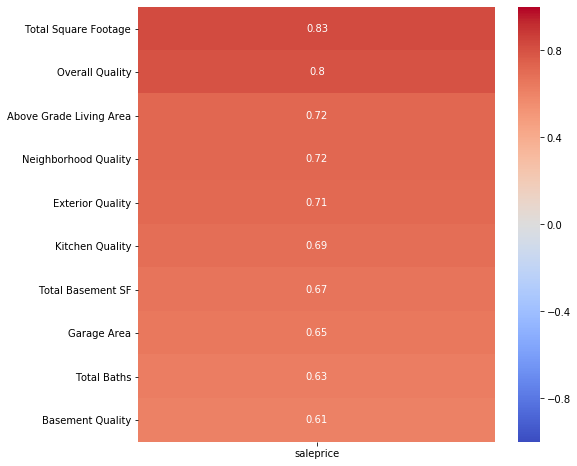

In [58]:
plt.figure(figsize = (8, 8))
sns.heatmap(train.corr()[['saleprice']].sort_values('saleprice', ascending = False)[1:].head(10),
            annot = True, cmap = 'coolwarm', vmax = 1, vmin = -1,
            yticklabels = ['Total Square Footage', 'Overall Quality', 'Above Grade Living Area',
                           'Neighborhood Quality', 'Exterior Quality', 'Kitchen Quality',
                           'Total Basement SF', 'Garage Area', 'Total Baths', 'Basement Quality']);

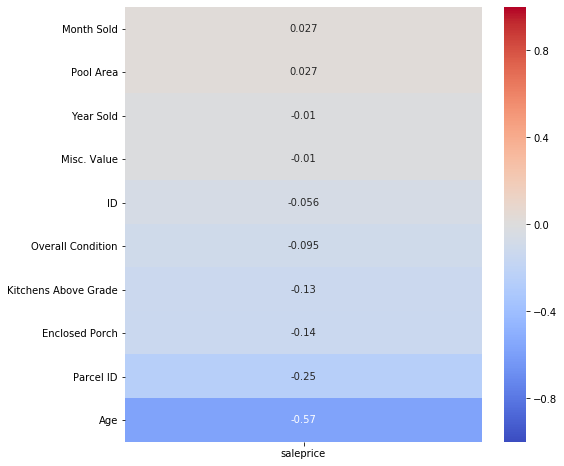

In [59]:
plt.figure(figsize = (8, 8))
sns.heatmap(train.corr()[['saleprice']].sort_values('saleprice', ascending = False).tail(10),
            annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1,
            yticklabels = ['Month Sold', 'Pool Area', 'Year Sold', 'Misc. Value', 'ID',
                           'Overall Condition', 'Kitchens Above Grade', 'Enclosed Porch',
                           'Parcel ID', 'Age']);

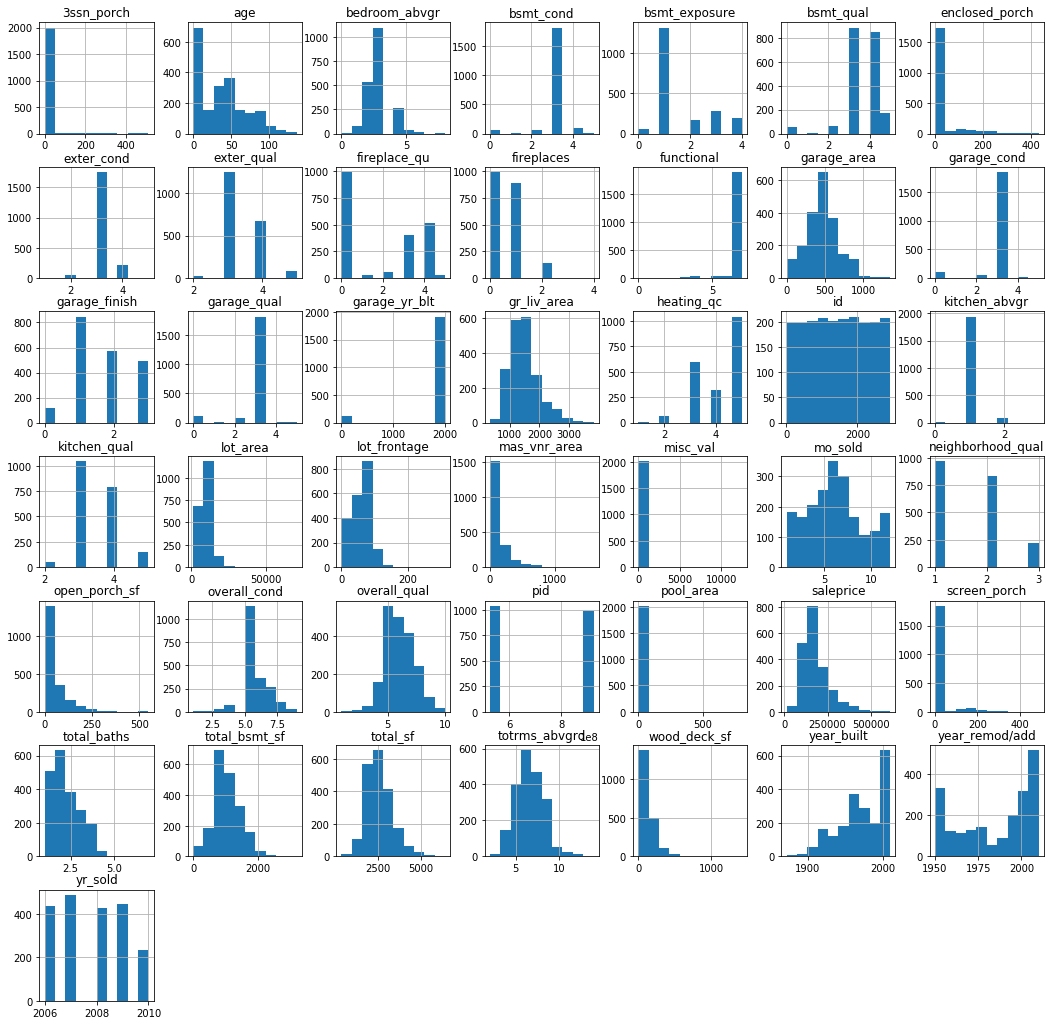

In [60]:
train.hist(figsize = (18, 18))
plt.tight_layout;

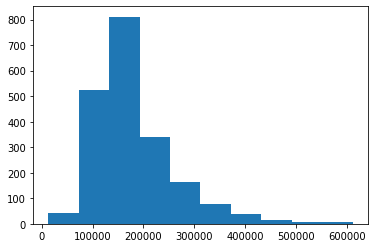

In [61]:
plt.hist(train['saleprice']);

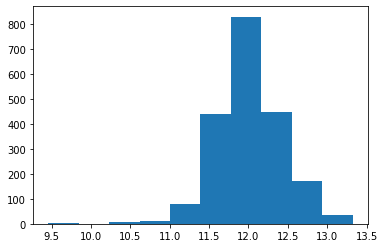

In [62]:
# Log of saleprice has a more normal distribution
# Should consider using log of saleprice for linear regression model
plt.hist(np.log(train['saleprice']));

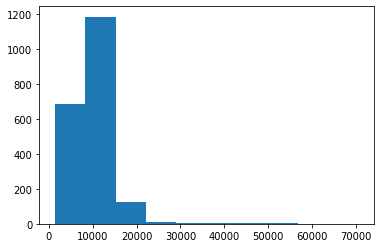

In [63]:
plt.hist(train['lot_area']);

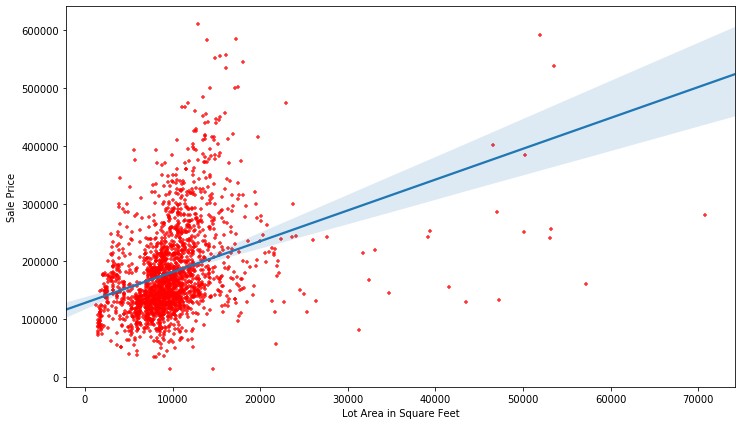

In [64]:
plt.figure(figsize = (12, 7))
sns.regplot(train['lot_area'], train['saleprice'],
            marker = '+', scatter_kws = {'s': 15, 'color': 'red'}).set(xlabel = 'Lot Area in Square Feet',
                                                                       ylabel = 'Sale Price');

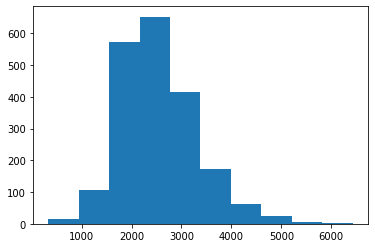

In [65]:
plt.hist(train['total_sf']);

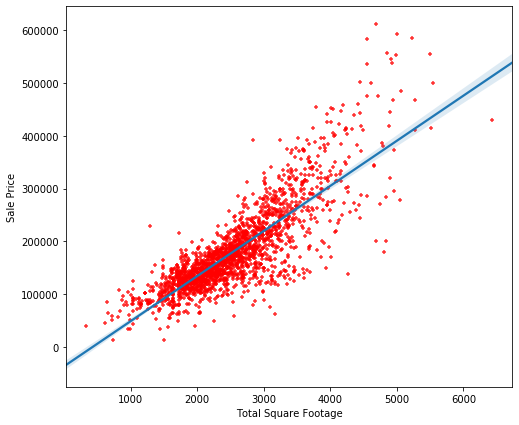

In [66]:
plt.figure(figsize = (8, 7))
sns.regplot(train['total_sf'], train['saleprice'],
            marker = '+', scatter_kws = {'s': 15, 'color': 'red'}).set(xlabel = 'Total Square Footage',
                                                                       ylabel = 'Sale Price');

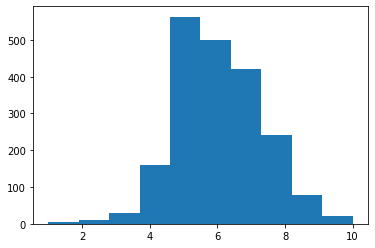

In [67]:
plt.hist(train['overall_qual']);

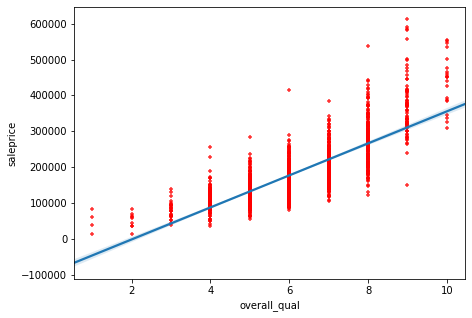

In [68]:
plt.figure(figsize = (7, 5))
sns.regplot(train['overall_qual'], train['saleprice'],
            marker = '+', scatter_kws = {'s': 15, 'color': 'red'});

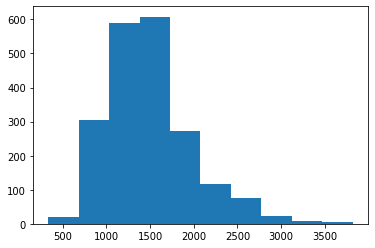

In [69]:
plt.hist(train['gr_liv_area']);

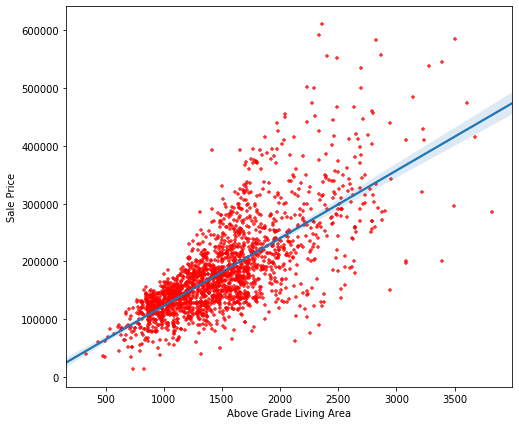

In [70]:
plt.figure(figsize = (8, 7))
sns.regplot(train['gr_liv_area'], train['saleprice'],
            marker = '+', scatter_kws = {'s': 15, 'color': 'red'}).set(xlabel = 'Above Grade Living Area',
                                                                       ylabel = 'Sale Price');

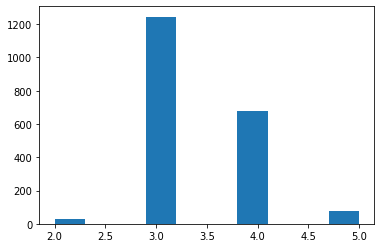

In [71]:
plt.hist(train['exter_qual']);

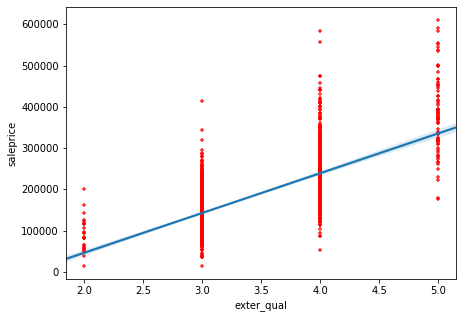

In [72]:
plt.figure(figsize = (7, 5))
sns.regplot(train['exter_qual'], train['saleprice'], marker = '+', scatter_kws = {'s': 15, 'color': 'red'});

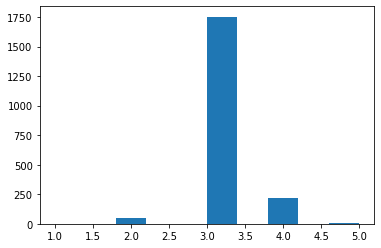

In [73]:
plt.hist(train['exter_cond']);

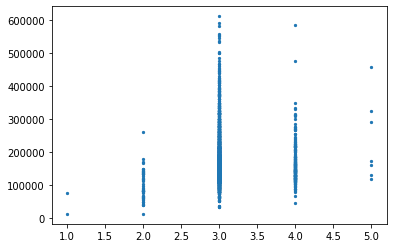

In [74]:
plt.scatter(train['exter_cond'], train['saleprice'], s = 5);

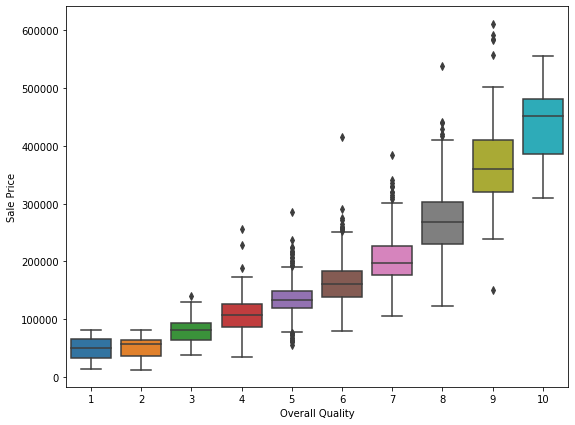

In [75]:
plt.figure(figsize = (9, 7))
sns.boxplot('overall_qual', 'saleprice', data = train).set(xlabel = 'Overall Quality', ylabel = 'Sale Price');

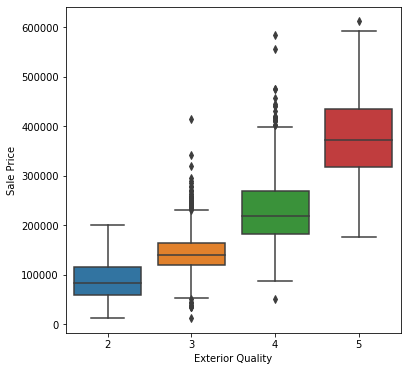

In [76]:
plt.figure(figsize = (6, 6))
sns.boxplot('exter_qual', 'saleprice', data = train).set(xlabel = 'Exterior Quality', ylabel = 'Sale Price');

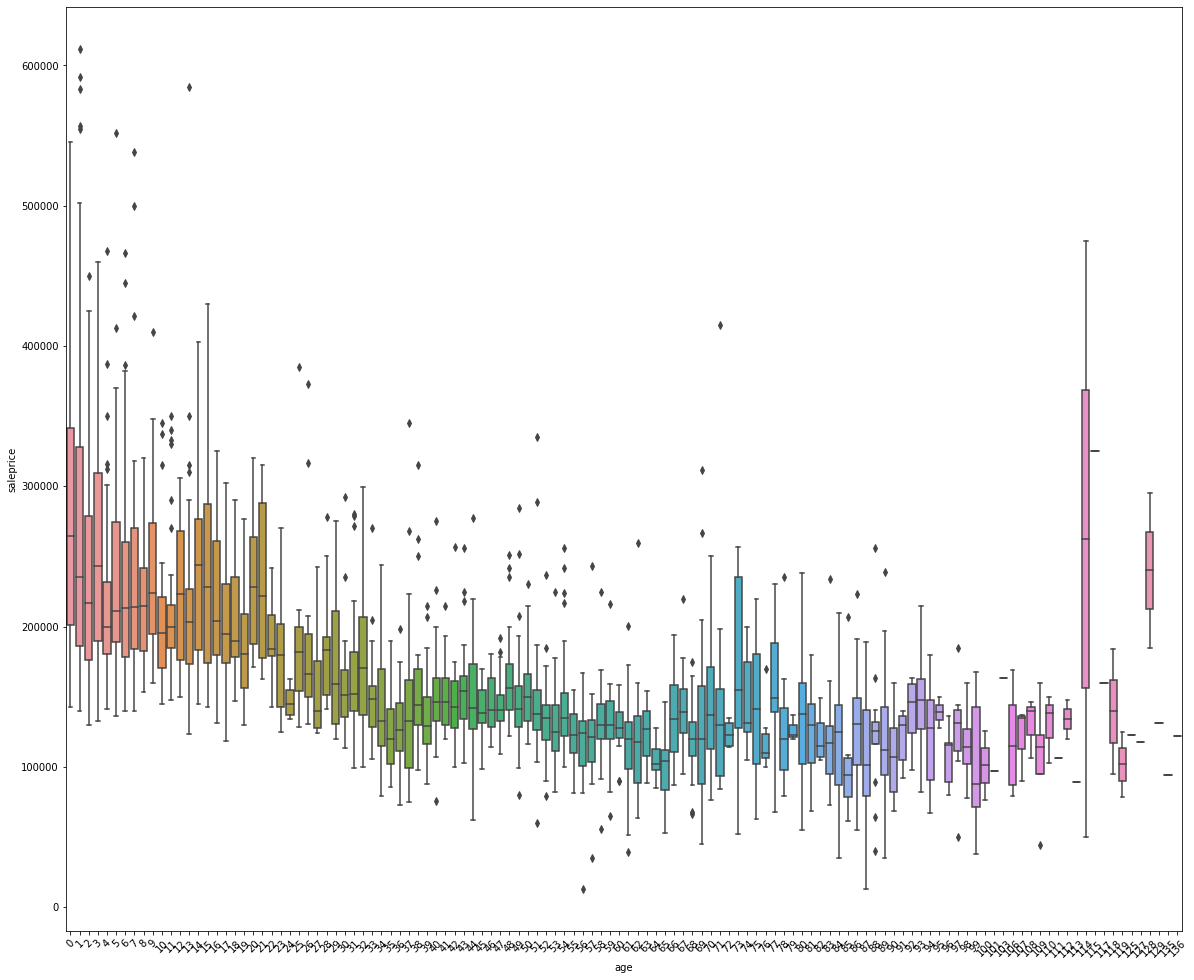

In [77]:
plt.figure(figsize = (20, 17))
plt.xticks(rotation = 45)
sns.boxplot('age', 'saleprice', data = train);

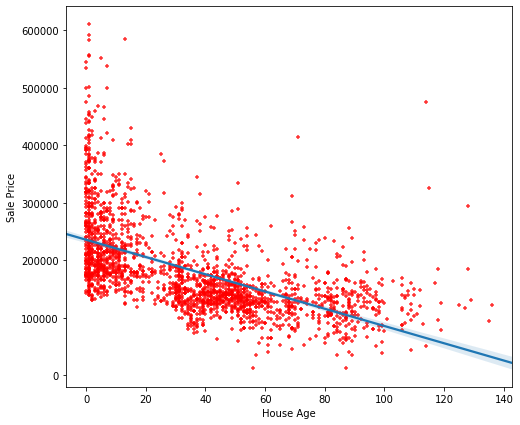

In [78]:
plt.figure(figsize = (8, 7))
sns.regplot('age', 'saleprice', data = train,
            marker = '+', scatter_kws = {'s': 15, 'color': 'red'}).set(xlabel = 'House Age',
                                                                       ylabel = 'Sale Price');

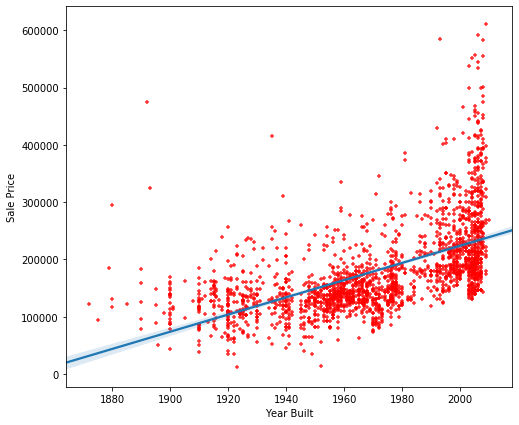

In [79]:
plt.figure(figsize = (8, 7))
sns.regplot('year_built', 'saleprice', data = train,
            marker = '+', scatter_kws = {'s': 15, 'color': 'red'}).set(xlabel = 'Year Built',
                                                                       ylabel = 'Sale Price');

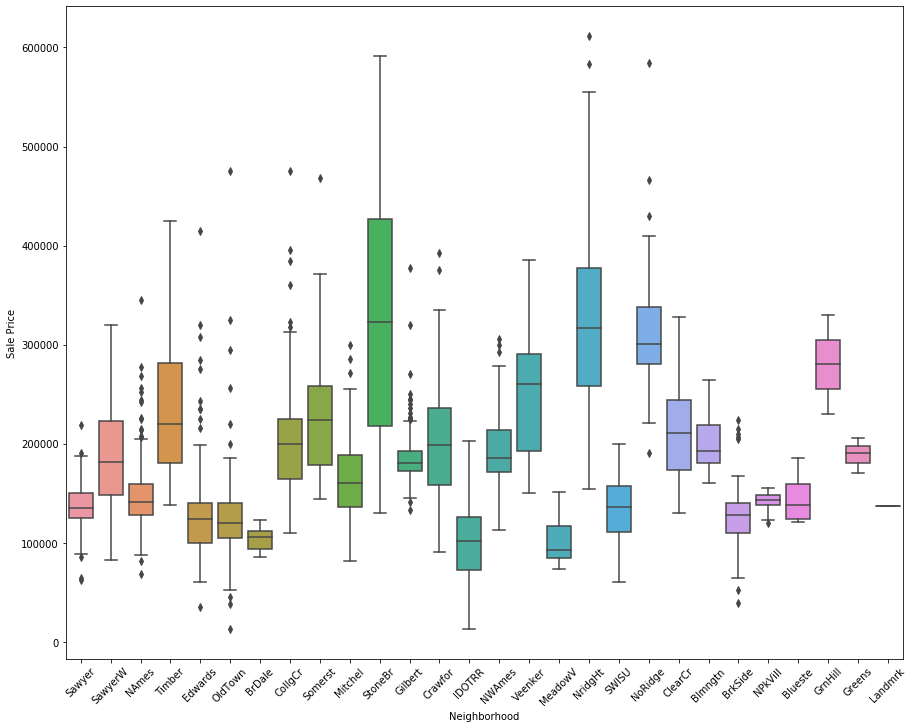

In [80]:
plt.figure(figsize = (15, 12))
plt.xticks(rotation = 45)
sns.boxplot('neighborhood', 'saleprice', data = train).set(xlabel = 'Neighborhood', ylabel = 'Sale Price');

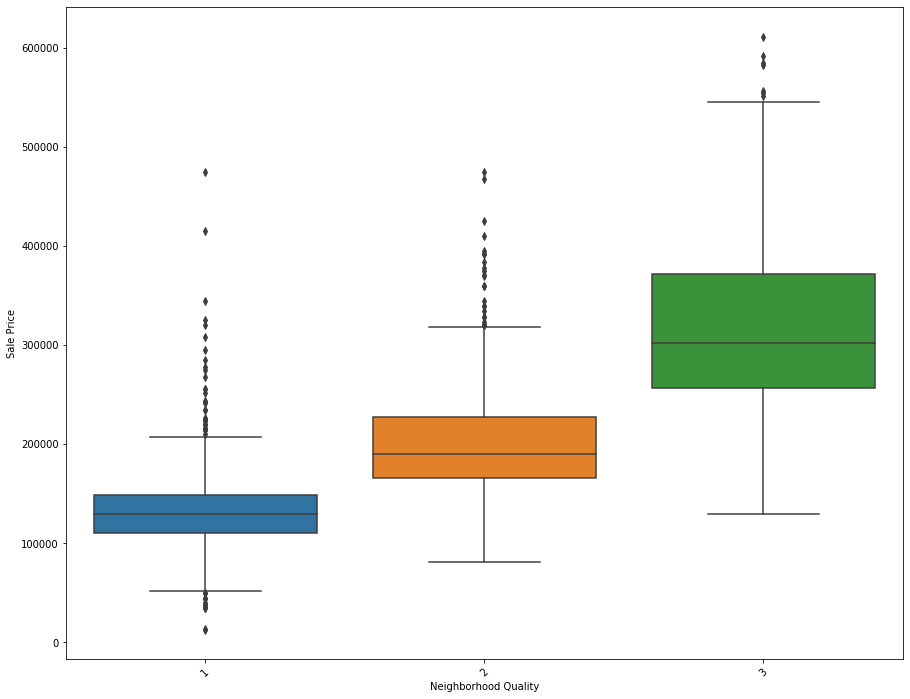

In [81]:
plt.figure(figsize = (15, 12))
plt.xticks(rotation = 45)
sns.boxplot('neighborhood_qual', 'saleprice', data = train).set(xlabel = 'Neighborhood Quality',
                                                                ylabel = 'Sale Price');

In [82]:
best_neighborhoods = ['StoneBr', 'NridgeHt', 'Veenker', 'NoRidge', 'GrnHill']
low_tier_neighborhoods = ['Sawyer', 'NAmes', 'Edwards', 'OldTown', 'BrDale', 'IDOTRR', 'MeadowV',
                          'SWISU', 'BrkSide', 'NPkVill', 'Blueste', 'Landmrk']
good_neighborhoods = ['SawyerW', 'Timber', 'CollgCr', 'Somerst', 'Mitchel', 'Gilbert',
                      'Crawfor', 'NWAmes', 'ClearCr', 'Blmngtn', 'Greens']

In [83]:
len(good_neighborhoods) + len(low_tier_neighborhoods) + len(best_neighborhoods)

28

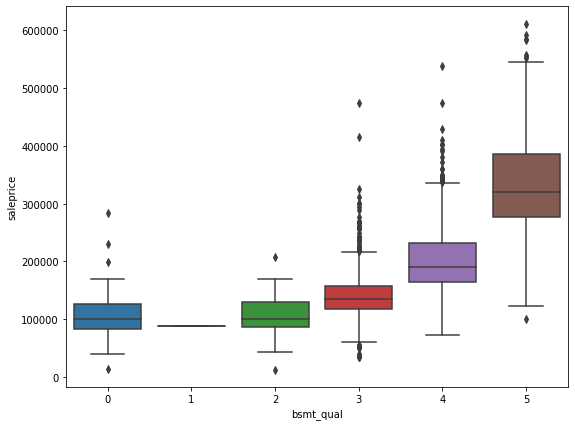

In [84]:
plt.figure(figsize = (9, 7))
sns.boxplot('bsmt_qual', 'saleprice', data = train);

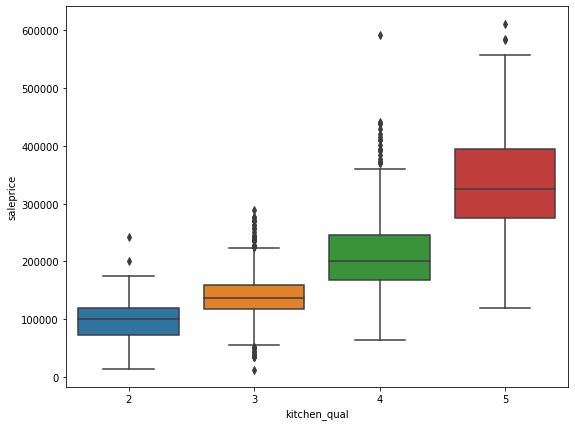

In [85]:
plt.figure(figsize = (9, 7))
sns.boxplot('kitchen_qual', 'saleprice', data = train);

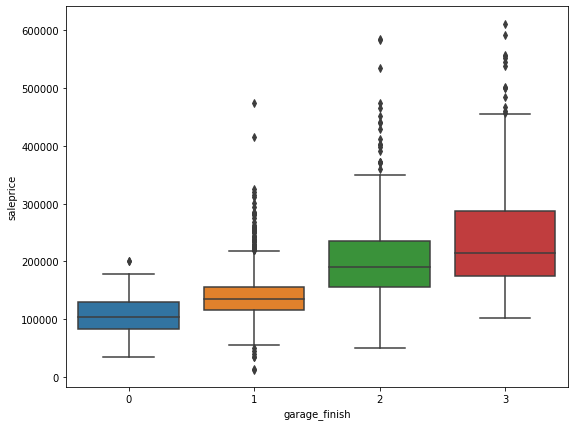

In [86]:
plt.figure(figsize = (9, 7))
sns.boxplot('garage_finish', 'saleprice', data = train);

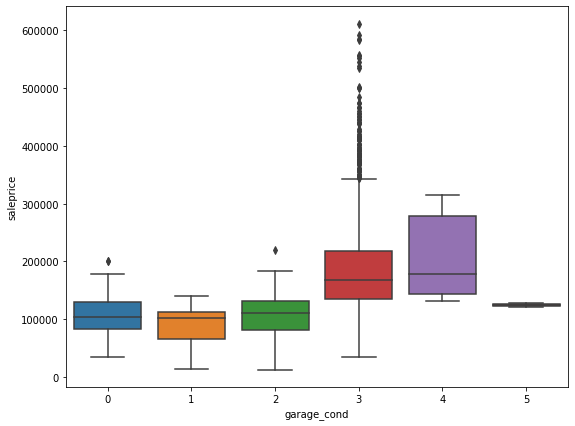

In [87]:
plt.figure(figsize = (9, 7))
sns.boxplot('garage_cond', 'saleprice', data = train);

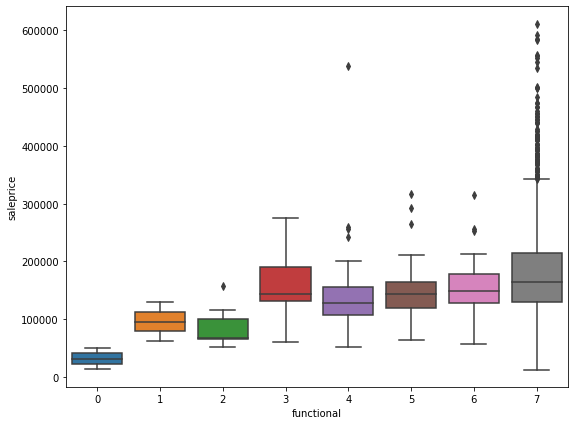

In [88]:
plt.figure(figsize = (9, 7))
sns.boxplot('functional', 'saleprice', data = train);

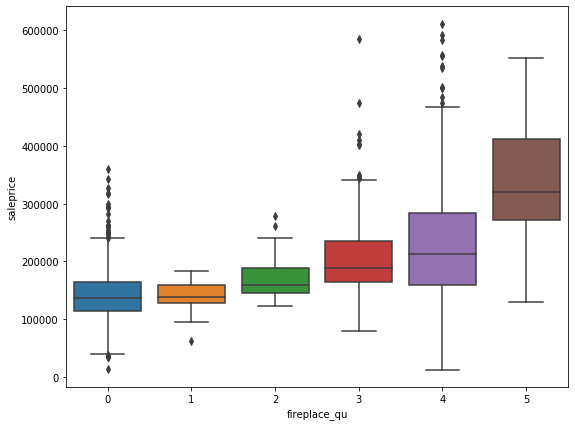

In [89]:
plt.figure(figsize = (9, 7))
sns.boxplot('fireplace_qu', 'saleprice', data = train);

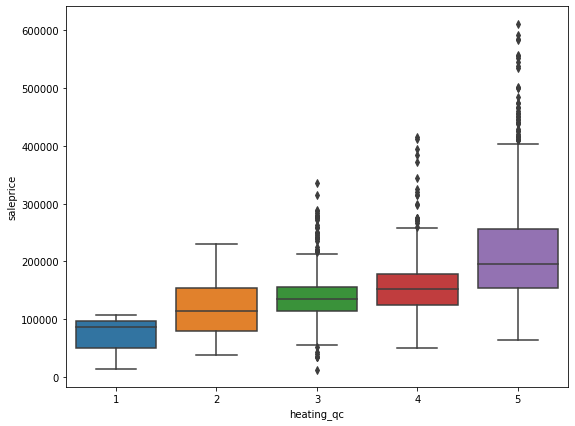

In [90]:
plt.figure(figsize = (9, 7))
sns.boxplot('heating_qc', 'saleprice', data = train);